In [19]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
from citipy import citipy
import random
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=94376307b91da84cb56adc09797a5d99


In [26]:
# Create a practice set of random latitude and longitude combinations.
x = 1
lats = []
lngs = []
while x < 1500:
    random_lat = random.randint(-90, 89) + random.random()
    random_lng = random.randint(-90, 89) + random.random()
    lats.append(random_lat)
    lngs.append(random_lng)
    x += 1
    
lat_lngs = zip(lats, lngs)
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [24]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


illoqqortoormiut gl
hermanus za
laguna br
moose factory ca
bay roberts ca
karpinsk ru
luderitz na
beliu ro
benguela ao
laval fr
hermanus za
punta arenas cl
french harbor hn
cockburn town tc
bathsheba bb
marawi sd
ormara pk
mahebourg mu
la palma pa
saldanha za
ayios matthaios gr
taolanaro mg
taolanaro mg
tinyahuarco pe
hermanus za
lundazi zm
brumunddal no
katsiveli ua
carutapera br
hermanus za
upernavik gl
ushuaia ar
bredasdorp za
oksfjord no
ilulissat gl
laguna br
sakakah sa
saldanha za
port alfred za
mogadishu so
ushuaia ar
bajil ye
georgetown sh
nanortalik gl
santa lucia pe
busselton au
arraial do cabo br
mizan teferi et
saint-philippe re
dikson ru
ushuaia ar
arraial do cabo br
saint george bm
ushuaia ar
souillac mu
masvingo zw
khash ir
jujuy ar
hermanus za
busselton au
porto novo cv
olafsvik is
hithadhoo mv
aconibe gq
viedma ar
ribeira grande pt
russkaya polyana ru
krasnoselkup ru
tete mz
clyde river ca
warmbad na
umm lajj sa
rajshahi bd
saint george bm
eyl so
richards bay za
los ll

ushuaia ar
saint-philippe re
busselton au
port alfred za
bhainsdehi in
cape town za
calabar ng
mar del plata ar
hermanus za
hofn is
ilulissat gl
margate za
tasiilaq gl
peskovka ru
karkaralinsk kz
grindavik is
najran sa
upernavik gl
rivera uy
ongandjera na
saint-philippe re
pokhara np
tazovskiy ru
taolanaro mg
leh in
sompeta in
hofn is
opuwo na
nioki cd
ushuaia ar
belyy yar ru
bay roberts ca
marsh harbour bs
belushya guba ru
nara ml
attawapiskat ca
viedma ar
tchollire cm
taolanaro mg
lucapa ao
qaanaaq gl
burgos es
havelock us
ushuaia ar
kodinar in
barra do garcas br
ondjiva ao
hermanus za
marcona pe
hammerfest no
beloha mg
grindavik is
walvis bay na
chapais ca
saint-philippe re
mahebourg mu
hastings sl
port alfred za
pangody ru
narsaq gl
barentsburg sj
hermanus za
bati et
qaanaaq gl
taolanaro mg
ushuaia ar
yar-sale ru
east london za
busselton au
dikson ru
mahebourg mu
ribeira grande pt
qaanaaq gl
valmiera lv
taolanaro mg
lebu cl
taoudenni ml
hermanus za
dosso ne
bulungu cd
saint-philipp

In [27]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


620

In [28]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [29]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | general roca
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | vestmannaeyjar
Processing Record 7 of Set 1 | mubarakpur
Processing Record 8 of Set 1 | cobija
Processing Record 9 of Set 1 | omboue
Processing Record 10 of Set 1 | road town
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | yabelo
Processing Record 14 of Set 1 | siuna
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | la rioja
Processing Record 20 of Set 1 | sorland
Processing Record 21 of Set 1 | sakakah
Processing Record 22 of Set 1 | grand gaube
P

Processing Record 34 of Set 4 | kakrala
Processing Record 35 of Set 4 | marienburg
Processing Record 36 of Set 4 | manhuacu
Processing Record 37 of Set 4 | pandamatenga
Processing Record 38 of Set 4 | manali
Processing Record 39 of Set 4 | the valley
Processing Record 40 of Set 4 | la libertad
Processing Record 41 of Set 4 | bozoum
Processing Record 42 of Set 4 | youkounkoun
Processing Record 43 of Set 4 | lagoa da prata
Processing Record 44 of Set 4 | dori
Processing Record 45 of Set 4 | klaksvik
Processing Record 46 of Set 4 | pimentel
Processing Record 47 of Set 4 | pisco
Processing Record 48 of Set 4 | miracema
Processing Record 49 of Set 4 | toma
Processing Record 50 of Set 4 | krasnousolskiy
City not found. Skipping...
Processing Record 1 of Set 5 | ginir
Processing Record 2 of Set 5 | urla
Processing Record 3 of Set 5 | demba
Processing Record 4 of Set 5 | sulurpeta
City not found. Skipping...
Processing Record 5 of Set 5 | iranshahr
Processing Record 6 of Set 5 | bauchi
Process

Processing Record 23 of Set 8 | umm kaddadah
Processing Record 24 of Set 8 | meulaboh
Processing Record 25 of Set 8 | kirkwall
Processing Record 26 of Set 8 | matara
Processing Record 27 of Set 8 | valkla
Processing Record 28 of Set 8 | los llanos de aridane
Processing Record 29 of Set 8 | kargopol
Processing Record 30 of Set 8 | forestville
Processing Record 31 of Set 8 | nueva germania
Processing Record 32 of Set 8 | fort-de-france
Processing Record 33 of Set 8 | gat
Processing Record 34 of Set 8 | brewster
Processing Record 35 of Set 8 | hihya
Processing Record 36 of Set 8 | iracoubo
Processing Record 37 of Set 8 | nargana
Processing Record 38 of Set 8 | lakselv
Processing Record 39 of Set 8 | richards bay
Processing Record 40 of Set 8 | tubruq
City not found. Skipping...
Processing Record 41 of Set 8 | sur
Processing Record 42 of Set 8 | muhos
Processing Record 43 of Set 8 | botshabelo
Processing Record 44 of Set 8 | athens
Processing Record 45 of Set 8 | aras
Processing Record 46 

Processing Record 13 of Set 12 | saint-louis
Processing Record 14 of Set 12 | harbour breton
Processing Record 15 of Set 12 | beitbridge
Processing Record 16 of Set 12 | ayagoz
Processing Record 17 of Set 12 | sechura
Processing Record 18 of Set 12 | harboore
Processing Record 19 of Set 12 | sidi qasim
City not found. Skipping...
Processing Record 20 of Set 12 | den helder
Processing Record 21 of Set 12 | tabulbah
City not found. Skipping...
Processing Record 22 of Set 12 | punta alta
Processing Record 23 of Set 12 | ongandjera
Processing Record 24 of Set 12 | prieska
Processing Record 25 of Set 12 | rio brilhante
Processing Record 26 of Set 12 | gazanjyk
Processing Record 27 of Set 12 | krasnokholmskiy
Processing Record 28 of Set 12 | muscle shoals
Processing Record 29 of Set 12 | mandiana
Processing Record 30 of Set 12 | raduzhnyy
Processing Record 31 of Set 12 | marsa matruh
Processing Record 32 of Set 12 | szczecin
Processing Record 33 of Set 12 | sidi ali
Processing Record 34 of S

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,53.22,49,93,9.60,AR,2023-01-24 19:10:59
1,General Roca,-39.0333,-67.5833,81.63,10,100,20.47,AR,2023-01-24 19:11:00
2,Bredasdorp,-34.5322,20.0403,63.25,50,94,9.42,ZA,2023-01-24 19:11:00
3,Busselton,-33.6500,115.3333,59.65,81,2,12.50,AU,2023-01-24 19:11:00
4,Vestmannaeyjar,63.4427,-20.2734,43.47,80,100,21.43,IS,2023-01-24 19:11:01
...,...,...,...,...,...,...,...,...,...
560,Oksbol,55.6268,8.2876,37.90,87,48,11.39,DK,2023-01-24 19:25:54
561,Qazvin,36.2797,50.0049,22.62,93,9,2.30,IR,2023-01-24 19:25:54
562,Shache,38.4167,77.2406,9.43,91,100,5.28,CN,2023-01-24 19:25:55
563,Bahia Blanca,-38.7196,-62.2724,82.29,34,2,1.99,AR,2023-01-24 19:23:04


In [32]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2023-01-24 19:10:59,-54.8000,-68.3000,53.22,49,93,9.60
1,General Roca,AR,2023-01-24 19:11:00,-39.0333,-67.5833,81.63,10,100,20.47
2,Bredasdorp,ZA,2023-01-24 19:11:00,-34.5322,20.0403,63.25,50,94,9.42
3,Busselton,AU,2023-01-24 19:11:00,-33.6500,115.3333,59.65,81,2,12.50
4,Vestmannaeyjar,IS,2023-01-24 19:11:01,63.4427,-20.2734,43.47,80,100,21.43


In [34]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


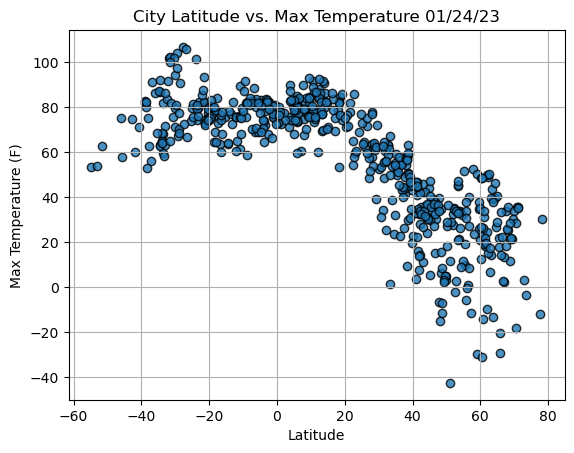

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


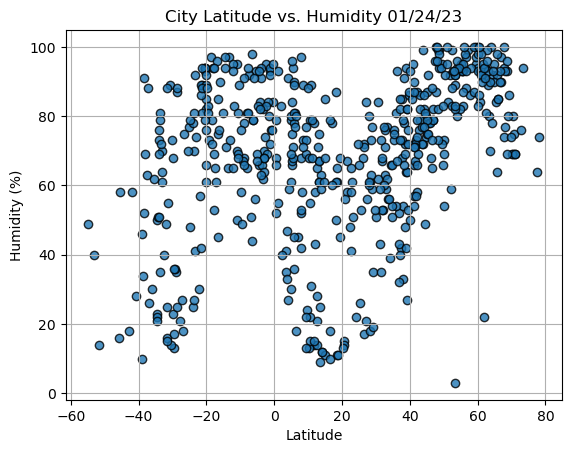

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


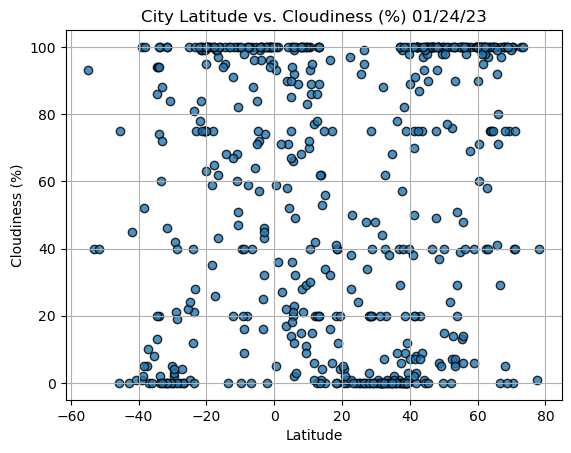

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


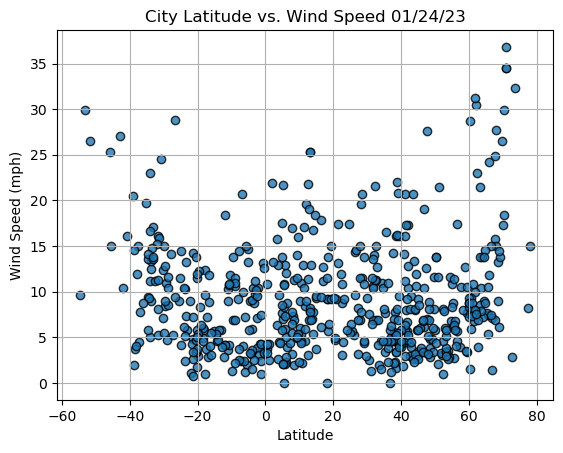

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
